In [75]:
import pandas as pd
import numpy as np


def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

df = get_data([170624, 170701, 170708, 170715, 170722, 170729])



In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184633 entries, 0 to 200111
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1184633 non-null  object
 1   UNIT                                                                  1184633 non-null  object
 2   SCP                                                                   1184633 non-null  object
 3   STATION                                                               1184633 non-null  object
 4   LINENAME                                                              1184633 non-null  object
 5   DIVISION                                                              1184633 non-null  object
 6   DATE                                                                  1184633 non-n

In [77]:
df.describe()

,ENTRIES,EXITS
count,1.184633e+06,1.184633e+06
mean,3.913340e+07,3.119781e+07
std,2.075873e+08,1.861406e+08
min,0.000000e+00,0.000000e+00
25%,4.957970e+05,2.456460e+05
50%,2.665217e+06,1.487189e+06
75%,6.827004e+06,4.781680e+06
max,2.130434e+09,2.097116e+09


In [78]:
df.rename(columns=lambda x: x.strip(), inplace= True)

In [79]:
df['diff_entries'] = df.ENTRIES.diff()
df['diff_exits'] = df.EXITS.diff()

df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,diff_entries,diff_exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,34.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,35.0,30.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,120.0,100.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,243.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200107,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/28/2017,07:58:36,REGULAR,5554,308,0.0,0.0
200108,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/28/2017,09:00:00,REGULAR,5554,308,0.0,0.0
200109,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/28/2017,13:00:00,REGULAR,5554,308,0.0,0.0
200110,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/28/2017,17:00:00,REGULAR,5554,308,0.0,0.0


In [80]:
df.loc[ df.diff_entries < 0]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,diff_entries,diff_exits
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,5621478,1248984,-612022.0,-861426.0
84,A002,R051,02-03-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,929806,3447515,-4698856.0,2196709.0
126,A002,R051,02-03-01,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,325205,522449,-608188.0,-2938288.0
210,A002,R051,02-03-03,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,5039667,5957676,-376578.0,-1498901.0
336,A002,R051,02-03-06,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,8039141,483105,-2186287.0,-834674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199798,TRAM1,R468,00-00-02,RIT-MANHATTAN,R,RIT,07/22/2017,01:00:00,REGULAR,1545538,20195,-770186.0,-3264.0
199836,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,07/22/2017,01:00:00,REGULAR,1991,0,-1548271.0,-20307.0
199923,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,07/22/2017,01:00:00,REGULAR,2308194,24919,-1488424.0,-28912.0
199968,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,RIT,07/22/2017,01:00:00,REGULAR,428674,17309,-1890550.0,-7765.0


In [81]:
df.diff_entries.mean()

-5.249952727935764

## framing questions 
-  When to shut down for maintenance?
-  Which tracks need repairing ?
-  In which order should the MTA schedule their track maintenance?
-  What are the alternate lines available in the station?


## cleaning
rename cols, remove blanks, look for nulls

In [82]:
import matplotlib.pyplot as plt


In [83]:
data.LINENAME.unique()


NameError: name 'data' is not defined

In [ ]:
df.DATE.value_counts().sort_index()

05/27/2017    27887
05/28/2017    27907
05/29/2017    27967
05/30/2017    28076
05/31/2017    28179
              ...  
07/24/2017    28415
07/25/2017    28413
07/26/2017    29843
07/27/2017    28065
07/28/2017    29233
Name: DATE, Length: 63, dtype: int64

In [ ]:
import datetime
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [ ]:
(df
 .groupby(["trsnd", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,trsnd,DATE_TIME,ENTRIES
0,A002-R051-02-00-00-59 ST,2017-05-27 00:00:00,1
1183611,R147-R033-04-00-05-TIMES SQ-42 ST,2017-06-14 16:00:00,1
1183622,R147-R033-04-00-05-TIMES SQ-42 ST,2017-06-16 12:00:00,1
1183621,R147-R033-04-00-05-TIMES SQ-42 ST,2017-06-16 08:00:00,1
1183620,R147-R033-04-00-05-TIMES SQ-42 ST,2017-06-16 04:00:00,1
...,...,...,...
591803,N181A-R464-00-06-03-AQUEDUCT RACETR,2017-07-07 12:00:00,1
591802,N181A-R464-00-06-03-AQUEDUCT RACETR,2017-07-07 08:00:00,1
591801,N181A-R464-00-06-03-AQUEDUCT RACETR,2017-07-07 04:00:00,1
591800,N181A-R464-00-06-03-AQUEDUCT RACETR,2017-07-07 00:00:00,1


In [ ]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [ ]:
ts_daily = (df
            .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
            .ENTRIES.first())

ts_daily

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-05-27 00:00:00,6195217
1,A002,R051,02-00-00,59 ST,2017-05-27 04:00:00,6195240
2,A002,R051,02-00-00,59 ST,2017-05-27 08:00:00,6195256
3,A002,R051,02-00-00,59 ST,2017-05-27 12:00:00,6195346
4,A002,R051,02-00-00,59 ST,2017-05-27 16:00:00,6195518
...,...,...,...,...,...,...
1775417,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-07-28 07:58:36,5554
1775418,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-07-28 09:00:00,5554
1775419,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-07-28 13:00:00,5554
1775420,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-07-28 17:00:00,5554


In [ ]:
ts_daily[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

ts_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

<ipython-input-43-daf2af0e5e72>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts_daily[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily


In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
ts_daily["DAILY_ENTRIES"] = ts_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

5439480 7807254.0
1079 1340598.0
77 1036866.0
117440518 2163442.0
24 2355469.0
0 4017898.0
4017898 0.0
4513770 299176.0
1567690923 1624939.0
138 2026736.0
1792 5916273.0
5916732 1792.0
67602596 117723395.0
1627413160 6389847.0
67 6737078.0
1819 1849872.0
1795 17546467.0
1051 2156003.0
7 8266480.0
206 16594634.0
150995082 892648.0
1173 5244254.0
114 1852696.0
6 134254774.0
11 20518689.0
79 1539105.0
28 83950705.0
10 2163204.0
2108 2342665.0
39 10610211.0
150994944 1090866487.0
134217738 25673.0
100663432 11588.0
57 101036197.0
83886131 76991.0
4084118 102746811.0
100964269 4083712.0
4314484 100964214.0
409 4314407.0
3 84145227.0
151025051 3463157.0
2056 11782239.0
1258286595 11897615.0
5505031 785560.0
1073550180 100848690.0
458825 67241076.0
16777239 459687.0
117440578 16777527.0
1774 4472070.0
132 2446091.0
28 1684866.0
248 1444551.0
117528648 67168456.0
22 3614530.0
55 5449984.0
330 12099316.0
1857 7431003.0
1901 7340940.0
146 2520625.0
1073708202 8607258.0
8607302 1073708202.0
16106

In [ ]:
ts_daily.loc[ts_daily.DAILY_ENTRIES == 0].STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'CHAMBERS ST', 'FULTON ST',
       'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'CHURCH AV', 'NEWKIRK PLAZA', 'AVENUE H',
       'AVENUE J', 'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD',
       'SHEEPSHEAD BAY', 'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL',
       'JAY ST-METROTEC', 'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST',
       '4AV-9 ST', 'PROSPECT AV', '25 ST', '36 ST', '45 ST', '77 ST',
       '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'NEW UTRECHT AV', '18 AV',
       '20 AV', 'BAY PKWY', '9 AV', 'FT HAMILTON PKY', '55 ST', '71 ST',
       '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
       'W 8 ST-AQUARIUM', '6 AV', '3 AV', '1 AV', 'BEDFORD AV',
       'LORIMER ST', 'GRAHAM AV', 'GRAND 

<Figure size 432x288 with 0 Axes>

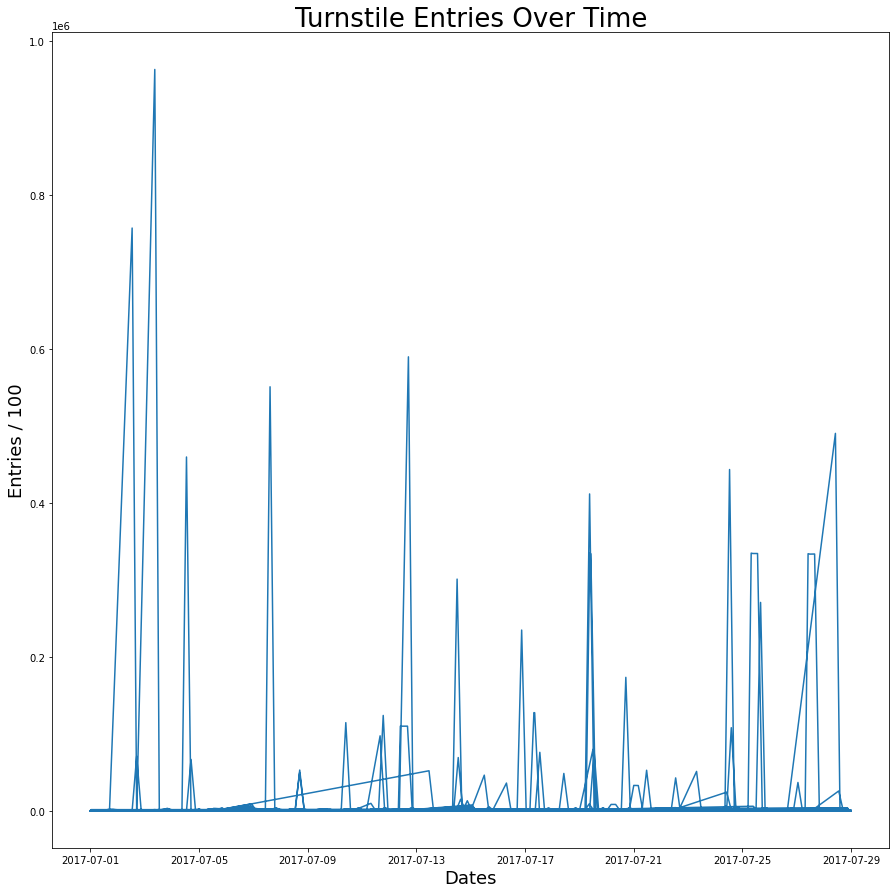

In [91]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel('Dates', fontsize = 18)
plt.ylabel('Entries / 100', fontsize = 18)
plt.title('Turnstile Entries Over Time', fontsize = 26)

l = ts_daily.loc[ts_daily.DATE_TIME > '2017-07-01']

plt.plot(l.DATE_TIME, l.DAILY_ENTRIES);
plt.savefig('test.jpg')

